In [1]:
import pandas as pd
from pathlib import Path
from sad2_final_project.analysis import add_missing_metrics_from_experiment, loader_obsolete_data
from sad2_final_project.bnfinder import load_external_data

# plots
## global
import matplotlib.pyplot as plt
import seaborn as sns
## local
from sad2_final_project.analysis import plot_boxplot, plot_histogram, plot_grouped_boxplots, compute_spearman_table, plot_spearman_heatmap, compute_wilcoxon_table, plot_wilcoxon_heatmap
# system , 
import os

# paths
## set global dir
cwd=Path.cwd()
if cwd.name == "notebooks":
    os.chdir(cwd.parent) 
print(os.getcwd())
## create paths 
DATA_PATH = Path('data/trajectory_length_vs_attractors1')

/home/maxi7524/repositories/SAD2_final_project


In [2]:
df = loader_obsolete_data(DATA_PATH / 'results/metadata.csv', DATA_PATH / 'results/joined_results_trajectory_length_vs_attractors.csv')
metrics_list=['TP', 'FP', 'FN', 'f1', 'accuracy', 'precision', 'recall', 'sensitivity', 'AHD', 'SHD', 'EHD', 'SID']
# df = add_missing_metrics_from_experiment(df, DATA_PATH, metrics_list, after_column='attractor_ratio')
df

Index(['num_nodes', 'update_mode', 'trajectory_length', 'n_trajectories',
       'sampling_frequency', 'score_function', 'n_parents_per_node', 'rep_id',
       'condition_id'],
      dtype='object')


,condition_id_num,dataset_succeeded,attractor_ratio,TP,FP,FN,precision,recall,sensitivity,AHD,...,BDe,num_nodes,update_mode,trajectory_length,n_trajectories,sampling_frequency,score_function,n_parents_per_node,rep_id,condition_id_name
0,0,False,0.776667,7.0,3.0,4.0,0.700000,0.636364,0.636364,0.350000,...,2093.753183,5,synchronous,10,50,1,MDL,"[1, 2, 3]",0,0000
1,1,False,0.744000,4.0,7.0,2.0,0.363636,0.666667,0.666667,0.450000,...,3525.393371,5,synchronous,10,50,1,MDL,"[1, 2, 3]",1,0001
2,2,False,0.851333,8.0,2.0,2.0,0.800000,0.800000,0.800000,0.200000,...,3089.352225,5,synchronous,10,50,1,MDL,"[1, 2, 3]",2,0002
3,3,False,0.844000,4.0,4.0,3.0,0.500000,0.571429,0.571429,0.583333,...,3298.020597,5,synchronous,10,50,1,MDL,"[1, 2, 3]",3,0003
4,4,False,0.862667,5.0,1.0,0.0,0.833333,1.000000,1.000000,0.050000,...,4801.738920,5,synchronous,10,50,1,MDL,"[1, 2, 3]",4,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23395,23395,True,0.587805,12.0,2.0,3.0,0.857143,0.800000,0.800000,0.069444,...,3650.863750,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",25,23395
23396,23396,False,0.996585,15.0,8.0,3.0,0.652174,0.833333,0.833333,0.152778,...,14077.049997,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",26,23396
23397,23397,False,1.000000,12.0,11.0,1.0,0.521739,0.923077,0.923077,0.166667,...,12617.349198,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",27,23397
23398,23398,True,0.542195,12.0,5.0,5.0,0.705882,0.705882,0.705882,0.138889,...,3865.383110,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",28,23398


### CZĘŚĆ 2

In [3]:
from sad2_final_project.analysis import analyze_datasets_from_index

## DROPPING VALUES 
df_series = df.copy()
### dropping values after 
df_series['scale'] = df_series["trajectory_length"] / df_series["num_nodes"]
df_series = df_series[df_series['scale'] < 1.5]
### dropping sets that have no sense
df_series = df_series[
    (df_series["trajectory_length"] / df_series["sampling_frequency"]) > 1
]
## calculate series 
df_series = add_missing_metrics_from_experiment(df_series, DATA_PATH, metrics_list, after_column='attractor_ratio')
df_series = analyze_datasets_from_index(df_series, 'condition_id_name', DATA_PATH, 1)

## setting groups for this experiment 
group_cols = ["update_mode", "score_function", "num_nodes"]

/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.

[Progress] 1000/8040 conditions completed (12.4%)


/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)


[Progress] 2000/8040 conditions completed (24.9%)
[Progress] 3000/8040 conditions completed (37.3%)
[Progress] 4000/8040 conditions completed (49.8%)


/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.

[Progress] 5000/8040 conditions completed (62.2%)


/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)


[Progress] 6000/8040 conditions completed (74.6%)
[Progress] 7000/8040 conditions completed (87.1%)


/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)


[Progress] 8000/8040 conditions completed (99.5%)
[Progress] 1/8040 conditions completed (0.0%)
[Progress] 2/8040 conditions completed (0.0%)
[Progress] 3/8040 conditions completed (0.0%)
[Progress] 4/8040 conditions completed (0.0%)
[Progress] 5/8040 conditions completed (0.1%)
[Progress] 6/8040 conditions completed (0.1%)
[Progress] 7/8040 conditions completed (0.1%)
[Progress] 8/8040 conditions completed (0.1%)
[Progress] 9/8040 conditions completed (0.1%)
[Progress] 10/8040 conditions completed (0.1%)
[Progress] 11/8040 conditions completed (0.1%)
[Progress] 12/8040 conditions completed (0.1%)
[Progress] 13/8040 conditions completed (0.2%)
[Progress] 14/8040 conditions completed (0.2%)
[Progress] 15/8040 conditions completed (0.2%)
[Progress] 16/8040 conditions completed (0.2%)
[Progress] 17/8040 conditions completed (0.2%)
[Progress] 18/8040 conditions completed (0.2%)
[Progress] 19/8040 conditions completed (0.2%)
[Progress] 20/8040 conditions completed (0.2%)
[Progress] 21/8040 

In [4]:
df_series.columns

Index(['condition_id_num', 'dataset_succeeded', 'attractor_ratio', 'TP', 'FP',
       'FN', 'f1', 'accuracy', 'precision', 'recall', 'sensitivity', 'AHD',
       'SHD', 'EHD', 'SID', 'log_likelihood', 'MDL', 'BDe', 'num_nodes',
       'update_mode', 'trajectory_length', 'n_trajectories',
       'sampling_frequency', 'score_function', 'n_parents_per_node', 'rep_id',
       'condition_id_name', 'scale', 'mean_lag1_acf', 'mean_ess'],
      dtype='object')

#### Part 0: Sample Size Adequacy and Statistical Validity 

Before applying any statistical tests, we verify that the number of available observations remains sufficient after filtering the data. In particular, we removed:

* configurations with scale ratio below 1.5,
* cases without effective subsampling (single-sample trajectories).

After this filtering step, we assess whether the remaining sample sizes are still representative.

The resulting sample counts are as follows:

* **sampling frequency × number of nodes**: at least 240 observations per group, and up to 480 in larger configurations,
* **scoring function × number of nodes**: between 540 and 1140 observations, depending on the condition.

These sample sizes are quite large, and still have all repetitions for every experiment.

In [5]:
table = pd.pivot_table(
    df_series,
    index='sampling_frequency',
    columns='num_nodes',
    aggfunc='size',
    fill_value=0
)
table

num_nodes,5,7,9,11,13
sampling_frequency,,,,,
1,240,480,480,240,240
2,240,480,480,240,240
3,240,480,480,240,240
4,240,480,480,240,240
5,120,360,360,240,240


In [6]:
table = pd.pivot_table(
    df_series,
    index='score_function',
    columns='num_nodes',
    aggfunc='size',
    fill_value=0
)
table

num_nodes,5,7,9,11,13
score_function,,,,,
BDE,540,1140,1140,600,600
MDL,540,1140,1140,600,600


#### Part 1: ESS and ACF vs Sampling Frequency 

This section analyzes how sampling frequency affects temporal dependence in the generated datasets. We focus on two diagnostics:
* lag-1 autocorrelation (ACF),
* effective sample size (ESS).

##### Methodology 

We analyze the **mean lag-1 autocorrelation**, denoted `mean_lag1_acf`, which measures dependence between consecutive sampled time points. Lag 1 is chosen because it captures correlation between two adjacent time points.  

ESS is computed to quantify the amount of effectively independent information contained in the sampled trajectories. Higher ESS should bring more information to model training and improve reconstruction quality. 

---

##### Results: Lag-1 Autocorrelation (ACF)

For **synchronous update**, the distribution of `mean_lag1_acf` is centered close to zero across all sampling frequencies and network sizes. No systematic trend with respect to sampling frequency is observed. This behavior is expected, as synchronous dynamics define a deterministic mapping between states; subsampling does not substantially alter short-range temporal dependence.

For **asynchronous update**, we observe:

* a clear decrease in lag-1 autocorrelation when increasing sampling frequency from 1 to 3,
* a weaker but still noticeable change between frequencies 1 and 4,
* a potential degradation or saturation between frequencies 4 and 5.

These observations suggest that subsampling reduces short-range dependence in asynchronous trajectories up to a point, beyond which additional subsampling start to increase ACF. The non-monotonic behavior at higher sampling frequencies requires further statistical testing to assess significance.

---

##### Results: Effective Sample Size (ESS) 

For **synchronous update**, ESS increases clearly with sampling frequency across all network sizes. This indicates that subsampling effectively reduces redundancy in deterministic dynamics. 

For **asynchronous update**, the pattern is less clear:

* ESS values are substantially lower than in the synchronous case,
* increases in sampling frequency do not translate into uniform gains in ESS,
* ESS appears to depend jointly on sampling frequency and network size.

This suggests that stochastic update dynamics introduce long-range temporal correlations that are not fully mitigated by simple subsampling. s a result, sampling frequency alone is insufficient to ensure an increase in ESS in asynchronous trajectories.

##### Conclusion
For both **synchronous** and **asynchronous** update there is no clear relation between ESS and ACF. In next parts we will need to examine them independently. 

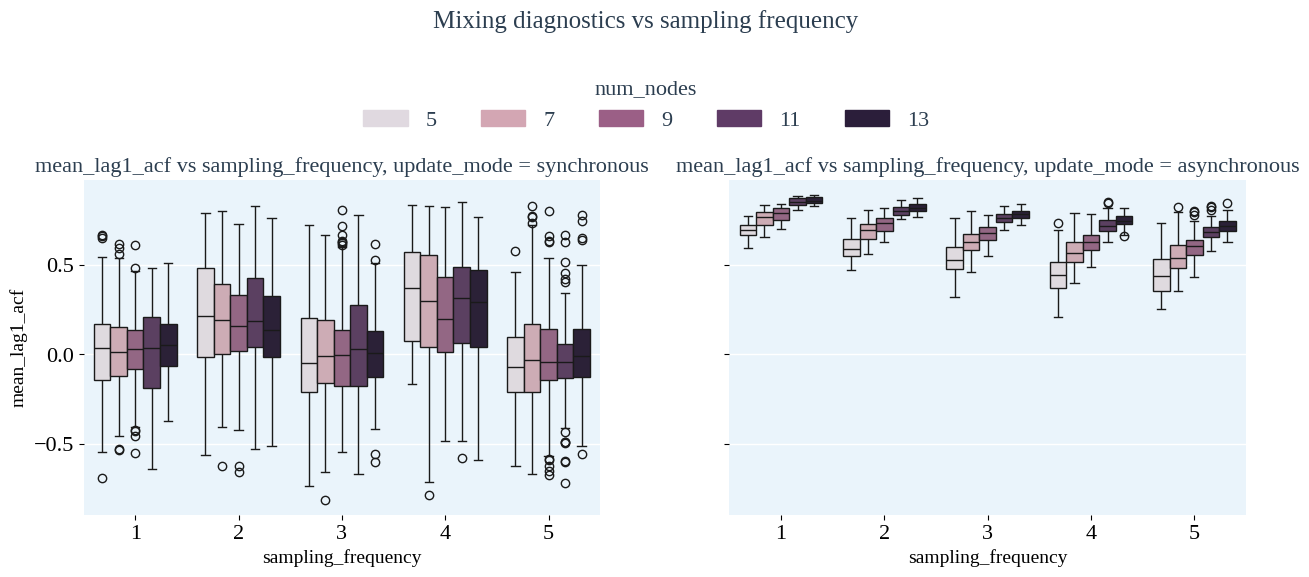

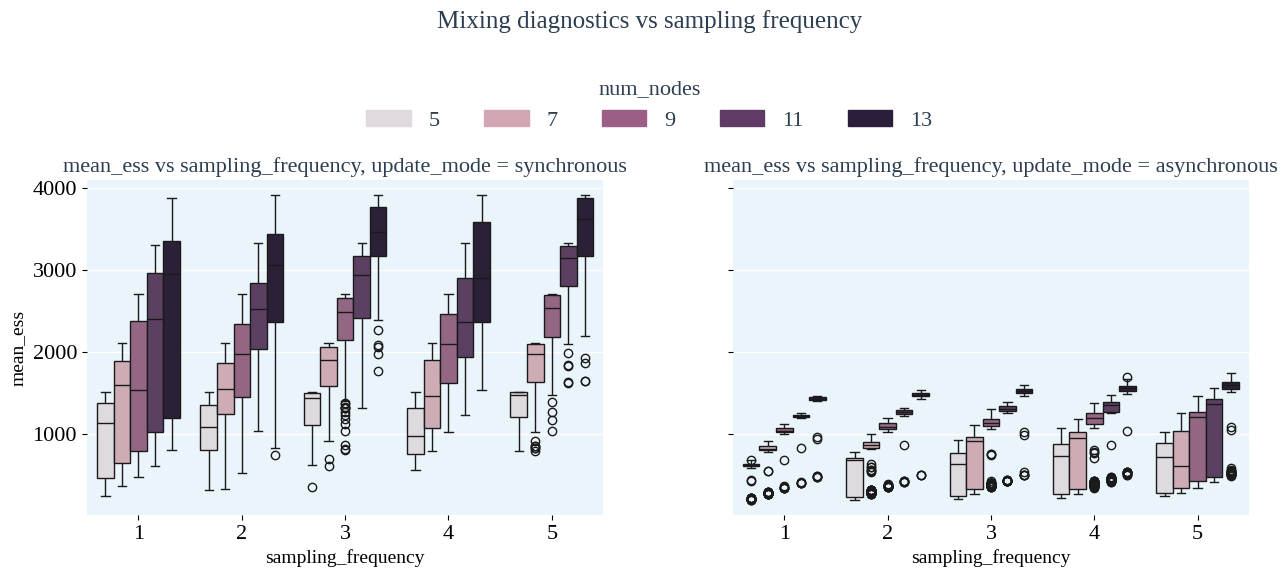

In [7]:
palette = [
    "#e0d9e0",  # najmniejsze num_nodes
    "#d3a6b3",
    "#9b5f86",
    "#5f3b66",
    "#2b1e3a"   # największe num_nodes
]

plot_grouped_boxplots(
    df=df_series,
    group_col=None,                       # ← kluczowe
    x_col="sampling_frequency",
    y_cols=["mean_lag1_acf", "mean_ess"],
    hue_col="num_nodes",
    hue_palette=palette,
    facet_col="update_mode",              # ← porównanie sync vs async
    facet_levels=["synchronous", "asynchronous"],
    main_title="Mixing diagnostics vs sampling frequency",
)





#### Analysis 2: Reconstruction quality vs sampling frequency

##### Methodology

In this analysis, we study the relationship between **sampling frequency** and **model reconstruction quality**, measured using the structural accuracy metrics **AHD** and **SID**.

The objective is to determine how changes in sampling frequency affect the quality of inferred network structures.

---

##### Analysis: Synchronous update 

For the **synchronous update mode**, a clear pattern is observed in both reconstruction metrics.

As shown in:

* **AHD vs sampling frequency** plots (top row, synchronous panels),
* **SID vs sampling frequency** plots (middle upper row, synchronous panels),

the smallest values of both AHD and SID are obtained for **sampling frequency = 1**, across all network sizes and for both MDL and BDe scoring functions. Increasing the sampling frequency leads to a systematic degradation of reconstruction quality.

Given the consistency of this effect across metrics, scoring functions, and network sizes, no further statistical testing is required for the synchronous case.

##### Analysis: Asynchronous update

For the **asynchronous update mode**, the behavior is not clear.

From the corresponding plots:

* **AHD vs sampling frequency** (middle lower row, asynchronous panels),
* **SID vs sampling frequency** (bottom row, asynchronous panels),

we observe that reconstruction quality generally improves when increasing sampling frequency from 1 to approximately 3. Beyond this point improvement become inconsistent across network sizes and score functions.

This lack of monotonicity indicates that, in the asynchronous case, the relationship between sampling frequency and reconstruction quality is mediated by additional factors, such as long-range temporal dependence and network size. Consequently, inferential statistical tests are required to assess the significance of these trends.

---

##### Conclusions

We find a clear relationship between **sampling frequency** and **model reconstruction quality**, but this relationship is different for synchronous and asynchronous case:

* For **synchronous dynamics**, the optimal choice is **sampling frequency = 1**, as any subsampling leads to a consistent loss of structural and causal accuracy.
* For **asynchronous dynamics**, reconstruction quality generally improves with subsampling up to a moderate frequency (around 3), but no single optimal value can be identified without further statistical testing.

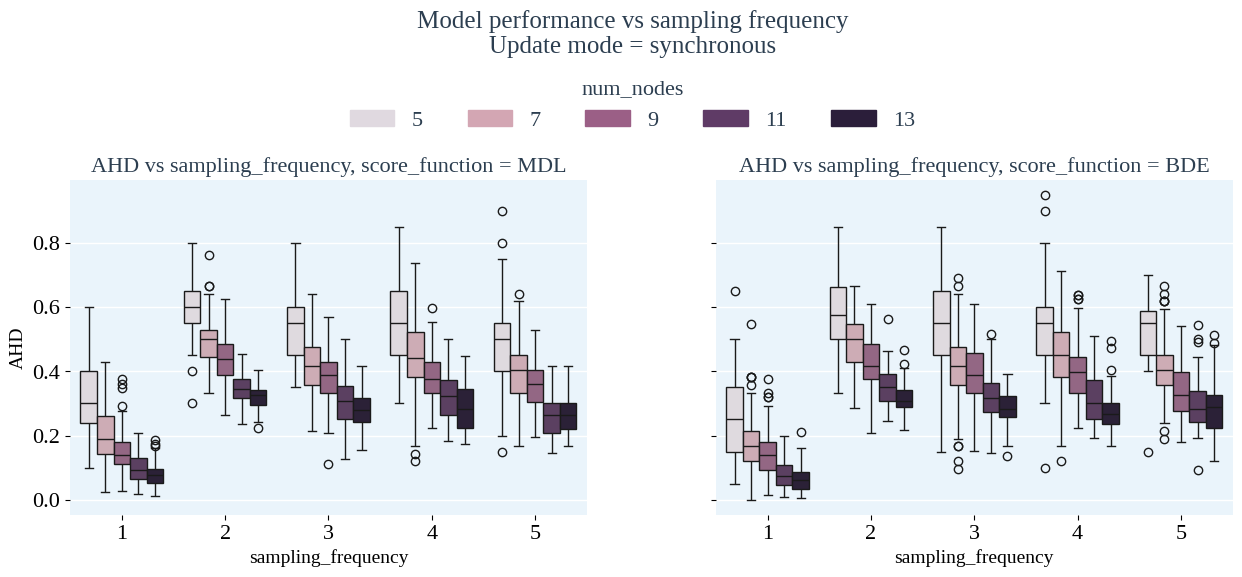

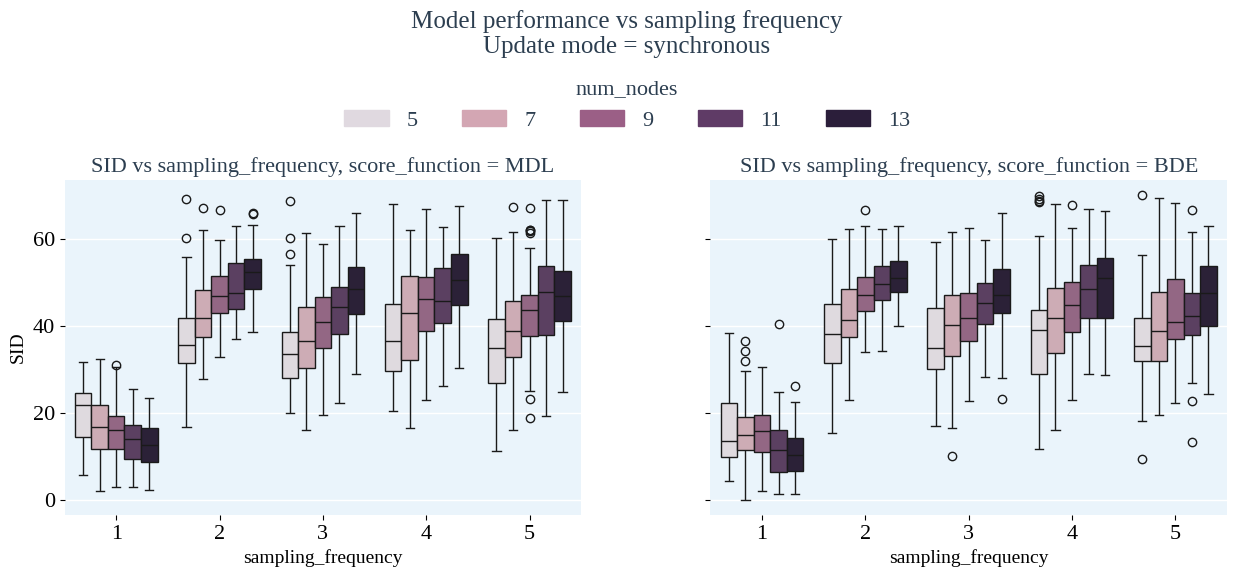

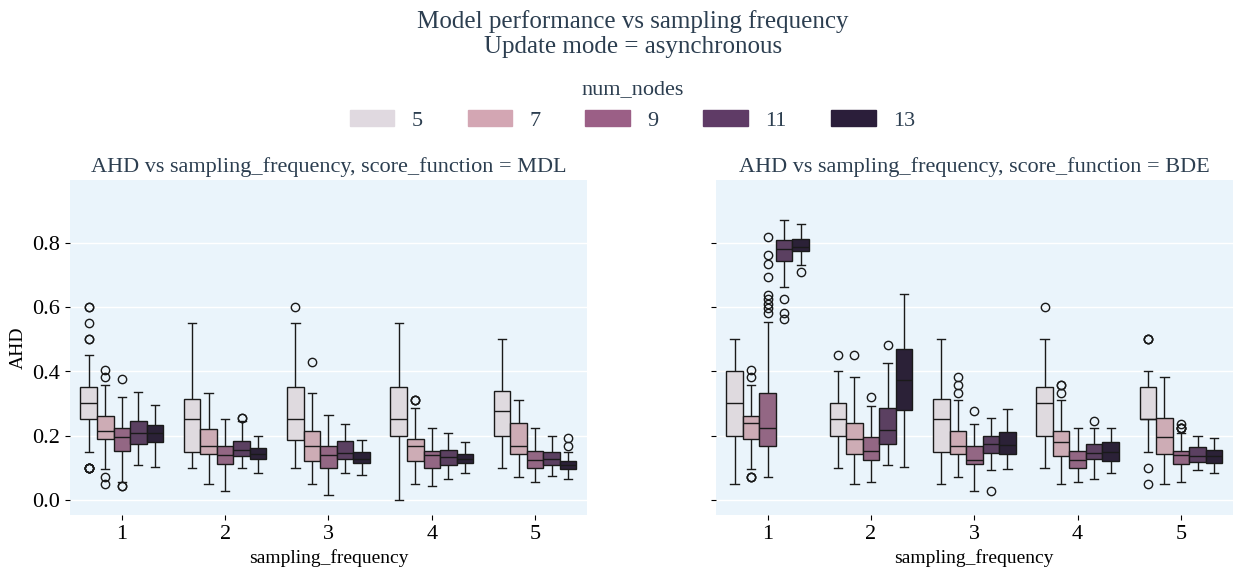

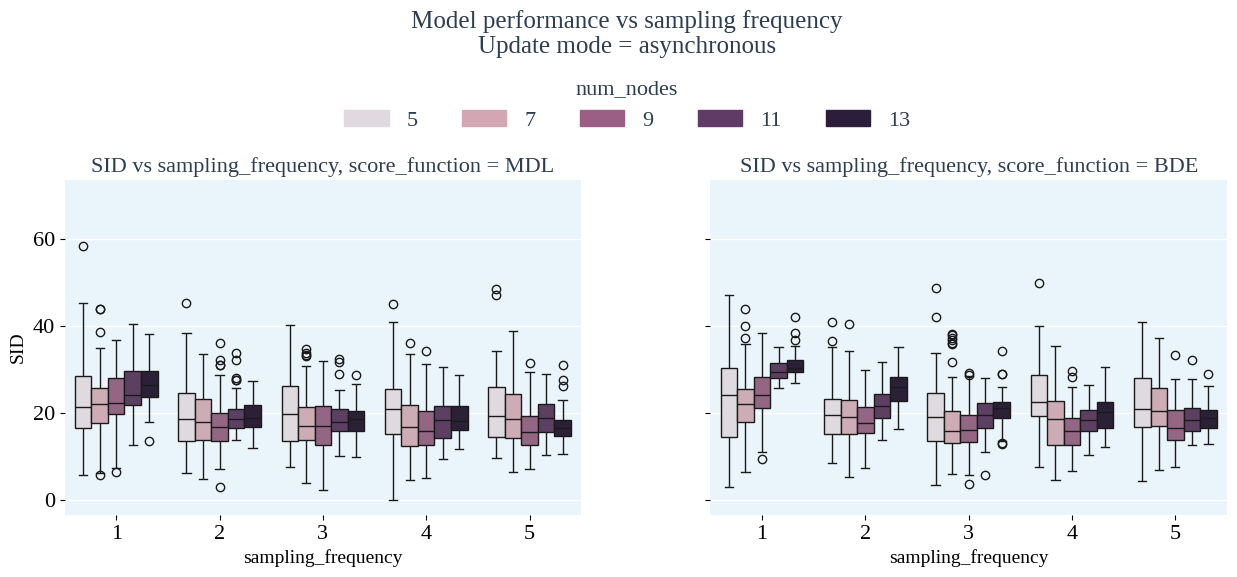

In [8]:
plot_grouped_boxplots(
    df=df_series,
    group_col="update_mode",
    x_col="sampling_frequency",
    y_cols=["AHD", "SID"],
    hue_col="num_nodes",
    hue_palette=palette,
    facet_col="score_function",
    facet_levels=["MDL", "BDE"],
    main_title="Model performance vs sampling frequency",
    group_title_fmt="Update mode = {}"
)



#### Part 3 – Spearman Correlation Analysis

##### Methodology

The main objective of this analysis is to assess whether properties of a data: **ESS** and **lag-1 ACF**, are associated with **model reconstruction quality**, measured using AHD and SID.

we compute **Spearman rank correlations** between:

* ESS and reconstruction metrics,
* lag-1 ACF and reconstruction metrics,

separately for groups defined by:

* update mode,
* score function,
* number of nodes.
* sampling_frequency

After prior filtering, each group contains between **60 and 120 observations**, which is sufficient for stable estimation of Spearman correlations if $\rho \geq 0.4$ (see Bonett & Wright, 2000).  Correlations are presented as heatmaps, independently for each combination of `num_nodes` and `score_function` and `update_mode`.

This analysis is conducted separately for ESS and ACF, as results from part 1 indicate that these quantities are not interchangeable and may capture different aspects of temporal dependence.

---

##### Results: ESS

The results for ESS are summarized in the **ESS–AHD** and **ESS–SID** heatmaps.

For the **synchronous update mode** (top heatmaps), Spearman correlation coefficients are close to zero across all network sizes and both scoring functions. No consistent monotonic relationship between ESS and reconstruction quality is observed for either AHD or SID.

In contrast, for the **asynchronous update mode** (bottom heatmaps), a clear negative trend is visible:

* ESS exhibits moderate negative correlations with AHD and SID,
* correlations are stronger for larger networks, ($\geq 9$)
* several correlations (3/12) are statistically significant.

This may suggest that, in asynchronous systems, higher effective sample size is associated with improved reconstruction quality, whereas in synchronous systems ESS does not appear to be a limiting factor. 

---

##### Results: Lag-1 Autocorrelation (ACF)

The analysis of lag-1 ACF reveals a complementary pattern.

For **synchronous update**, correlations between ACF and reconstruction metrics remain weak and inconsistent across all configurations, confirming that short-range autocorrelation does not meaningfully affect reconstruction quality in this regime.

For **asynchronous update**, we observe statistically significant correlations in selected configurations with larger BN (9, 11, 13):

* a significant correlation between ACF and **AHD** for the **MDL** score,
* a significant correlation between ACF and **SID** for the **BDe** score.

These effects are visible in the asynchronous ACF heatmaps and suggest that 
dependence on neighborhood samples influence negatively reconstruction quality.

---

##### Conclusions

We conclude that:

* There is **no meaningful monotonic relationship** between ESS or ACF and reconstruction quality in synchronous systems.
* In asynchronous systems, **higher ESS is may be associated with improved reconstruction quality**.
* In asynchronous systems, **Lag-1 ACF influences negatively reconstruction quality**

##### Reference

Bonett, D. G., & Wright, T. A. (2000). Sample size requirements for estimating Pearson, Kendall and Spearman correlations. Psychometrika, 65, 23–28.

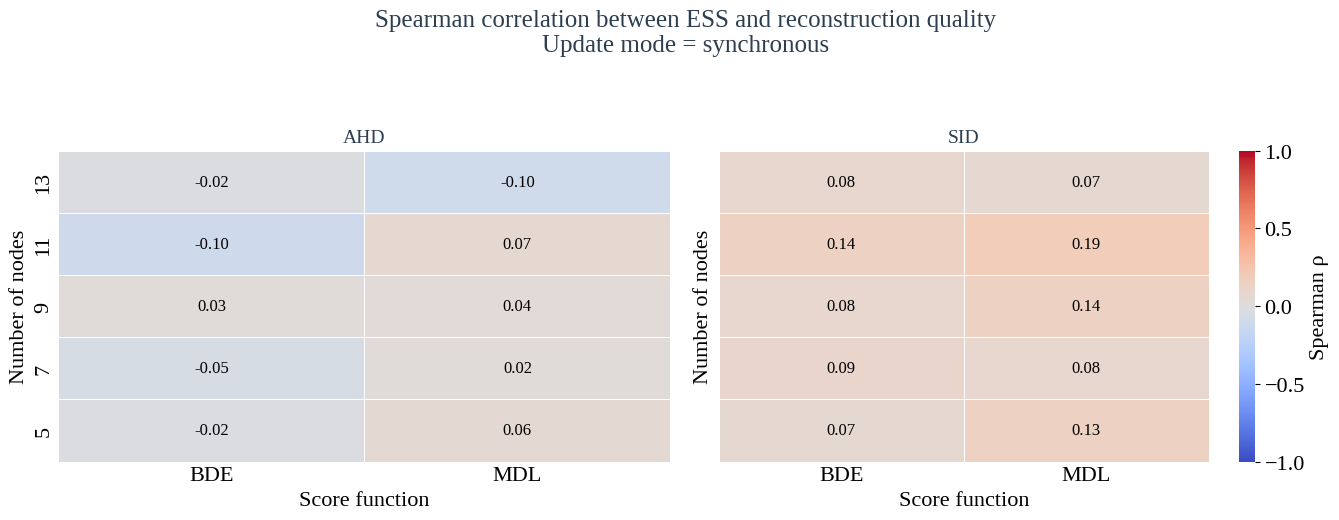

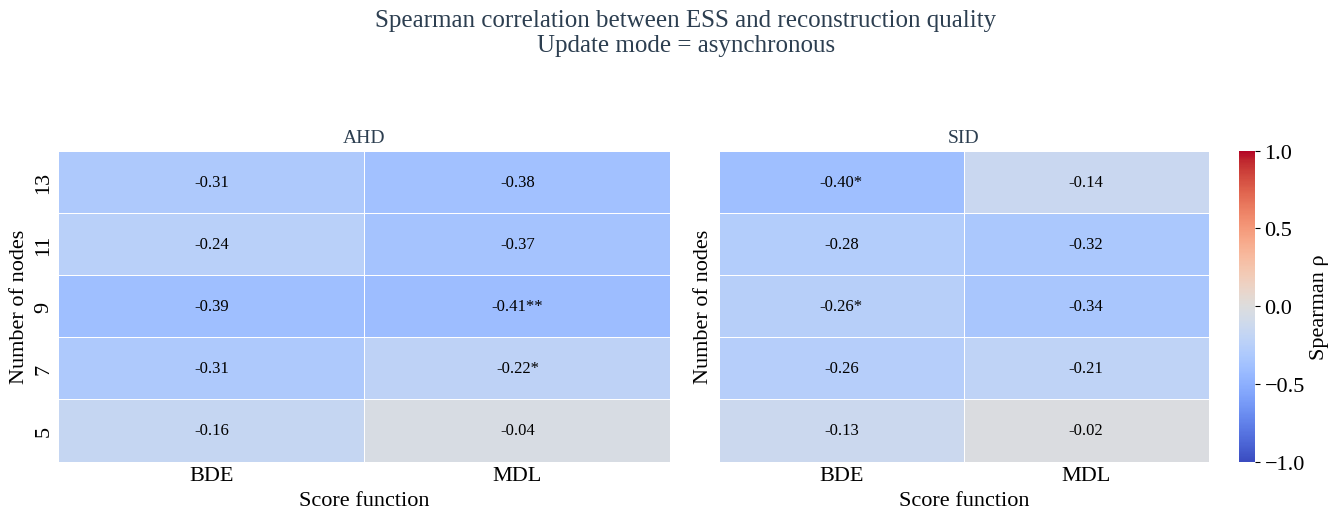

<Figure size 640x480 with 0 Axes>

In [9]:
group_cols = ["update_mode", "score_function", "num_nodes", "sampling_frequency"]

df_spearman = compute_spearman_table(
    df_series,
    metrics=["AHD", "SID"],
    group_cols = group_cols,
    ess_col= "mean_ess"
)



for update_mode in ["synchronous", "asynchronous"]:

    fig, axes = plt.subplots(
        1, 2,
        figsize=(14, 5),
        sharey=True
    )

    plot_spearman_heatmap(
        df_spearman,
        metric="AHD",
        update_mode=update_mode,
        num_nodes_order=sorted(df_series["num_nodes"].unique(), reverse=True),
        ax=axes[0],
        cbar=False
    )

    plot_spearman_heatmap(
        df_spearman,
        metric="SID",
        update_mode=update_mode,
        num_nodes_order=sorted(df_series["num_nodes"].unique(), reverse=True),
        ax=axes[1],
        cbar=True
    )

    fig.suptitle(
        "Spearman correlation between ESS and reconstruction quality\n"
        f"Update mode = {update_mode}",
        fontsize=18,
        y=1.05
    )

    plt.tight_layout()
    plt.show()

plt.tight_layout()
plt.show()



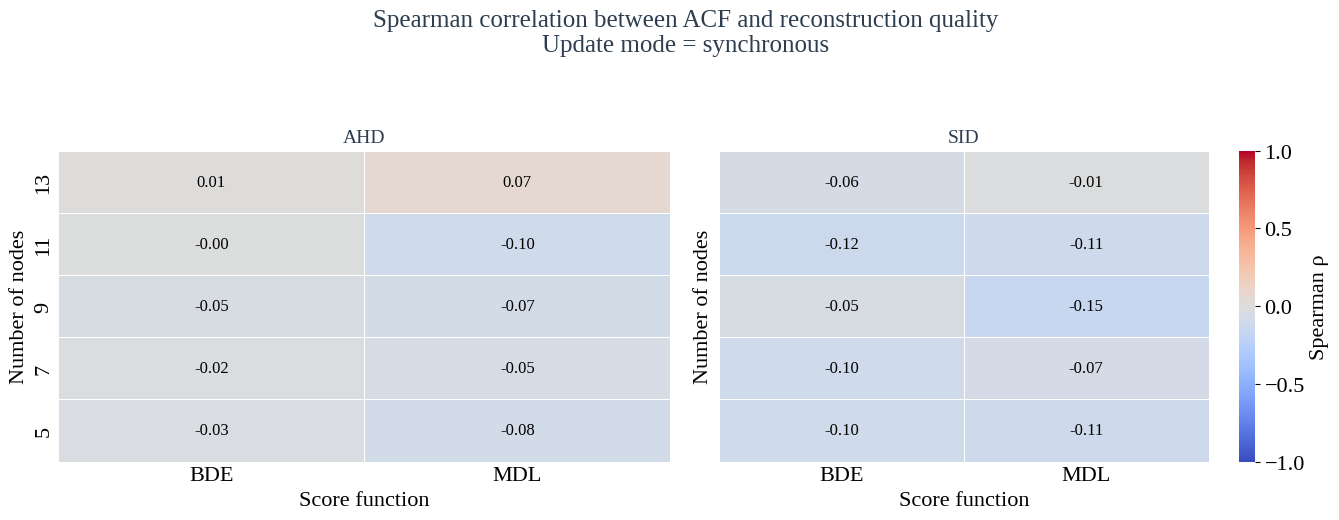

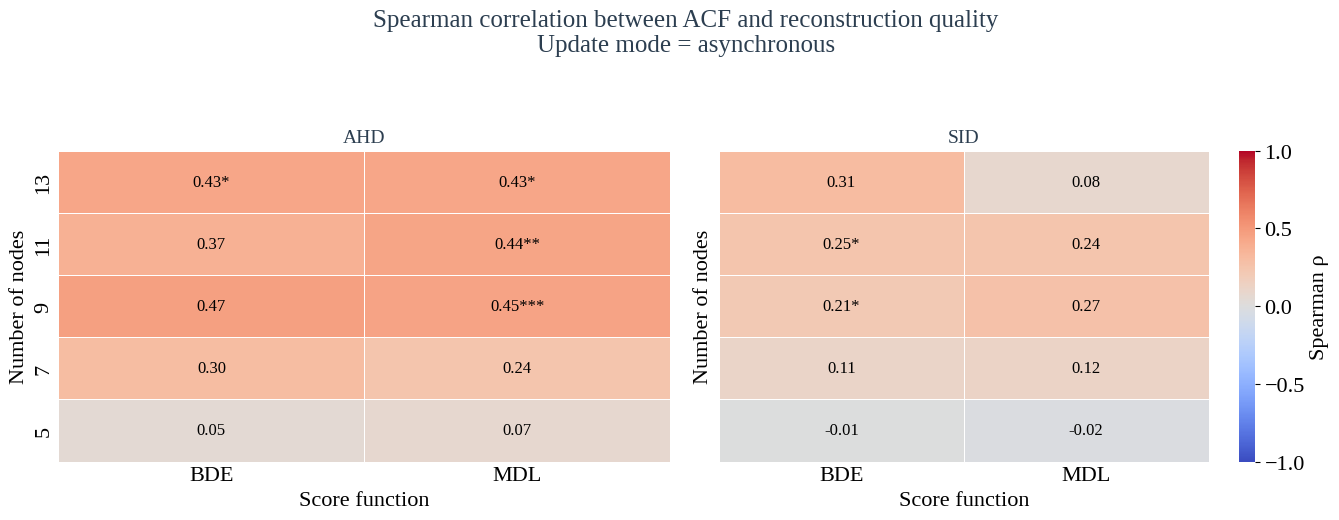

<Figure size 640x480 with 0 Axes>

In [10]:
group_cols = ["update_mode", "score_function", "num_nodes", "sampling_frequency"]

df_spearman = compute_spearman_table(
    df_series,
    metrics=["AHD", "SID"],
    group_cols = group_cols,
    ess_col= "mean_lag1_acf"
)


counts = (
    df_series
    .groupby(group_cols)
    .size()
    .reset_index(name="n_rows")
)
counts 

for update_mode in ["synchronous", "asynchronous"]:

    fig, axes = plt.subplots(
        1, 2,
        figsize=(14, 5),
        sharey=True
    )

    plot_spearman_heatmap(
        df_spearman,
        metric="AHD",
        update_mode=update_mode,
        num_nodes_order=sorted(df_series["num_nodes"].unique(), reverse=True),
        ax=axes[0],
        cbar=False
    )

    plot_spearman_heatmap(
        df_spearman,
        metric="SID",
        update_mode=update_mode,
        num_nodes_order=sorted(df_series["num_nodes"].unique(), reverse=True),
        ax=axes[1],
        cbar=True
    )

    fig.suptitle(
        "Spearman correlation between ACF and reconstruction quality\n"
        f"Update mode = {update_mode}",
        fontsize=18,
        y=1.05
    )

    plt.tight_layout()
    plt.show()

plt.tight_layout()
plt.show()



In [11]:
counts = (
    df_series
    .groupby(group_cols)
    .size()
    .reset_index(name="n_rows")
)
counts 

,update_mode,score_function,num_nodes,sampling_frequency,n_rows
0,asynchronous,BDE,5,1,60
1,asynchronous,BDE,5,2,60
2,asynchronous,BDE,5,3,60
3,asynchronous,BDE,5,4,60
4,asynchronous,BDE,5,5,30
...,...,...,...,...,...
95,synchronous,MDL,13,1,60
96,synchronous,MDL,13,2,60
97,synchronous,MDL,13,3,60
98,synchronous,MDL,13,4,60




#### Part 4. Does increasing sampling frequency significantly improve median reconstruction quality?

##### Methodology

The objective of this analysis is to assess whether **increasing the sampling frequency (sampling factor)** leads to **statistically significant changes in the median values of reconstruction quality metrics** for AHD and SID.

The analysis is conducted **exclusively for the asynchronous update mode**, as in the synchronous setting the descriptive results clearly indicate that the best reconstruction quality is achieved for **sampling factor equal to 1**, making further statistical comparisons unnecessary.

To isolate the effect of sampling frequency, all statistical tests are performed **within homogeneous experimental groups**, defined by the following variables:

* update mode,
* score function,
* number of nodes.

For each group, **paired comparisons** are performed between consecutive sampling factors (1→2, 2→3, 3→4, 4→5). The analysis considers two reconstruction quality metrics:

* AHD,
* SID,

and two score functions:

* BDe,
* MDL.

Statistical significance of median differences is assessed using the **single (greater) Wilcoxon signed-rank test**.

Depending on the experimental condition, the number of paired observations equals **900, 1800, or 3600**, which allows the applied tests to be considered as having **high statistical power**.

The results are summarized in a heatmap that presents:

* the median difference between consecutive sampling factors,
* statistical significance levels for each comparison.

---

##### Analysis

For **BDe**, a **statistically significant improvement in reconstruction quality is observed for the transition from sampling factor 2 to 3**, indicating a meaningful change in the ranking of graph structures induced by this cost function. No further gains are observed for higher sampling factors.

In contrast, when using **MDL**, statistically significant differences are observed only for the  transition from **sampling factor 1 to 2**. 

Importantly, these effects reflect changes in the **values of the cost functions used to rank candidate graph structures**, rather than direct improvements in the reconstruction metrics themselves. The observed differences may arise from BDe and MDL different construction, and usage of prior information from BDe.


---

##### Recommended configuration

Based on the obtained results, the following recommendations can be formulated:

* **synchronous**:
  the optimal sampling factor is **3** (part 2)

* **BDe (asynchronous)**:
  the optimal sampling factor is **3**, we show that changes in direction (1-2-3) significantly increase reconstruction quality (AHD, SID). 

* **MDL (asynchronous)**:
  the optimal sampling factor is **2**, we show that changes in direction (1-2) significantly increase reconstruction quality (AHD, SID). 

Higher sampling factors does not bring any differences, to reconstruction quality, it may only reduce them. 

In [12]:
group_cols = ["update_mode", "score_function", "num_nodes"]
df_wilcoxon = compute_wilcoxon_table(
    df_series,
    metrics=["AHD", "SID"],
    group_cols=group_cols,
    transitions=[(1,2), (2,3), (3,4), (4,5)], #TODO - tutaj wstawic kolejnośc z jaką chcesz sprawdzać (20, 40) ...
    sf_col='sampling_frequency' #TODO - tutaj wstawić tą kolumne co masz stałą normalizacji 
)

df_wilcoxon['n_pairs']
df_wilcoxon



,metric,sf_from,sf_to,transition,n_pairs,wilcoxon_stat,p_value,median_diff,update_mode,score_function,num_nodes
0,AHD,1,2,1→2,1800,816147.0,1.849133e-26,-0.050000,asynchronous,BDE,5
1,AHD,2,3,2→3,1800,666709.0,1.449905e-03,0.000000,asynchronous,BDE,5
2,AHD,3,4,3→4,1800,413684.0,1.000000e+00,0.050000,asynchronous,BDE,5
3,AHD,4,5,4→5,900,192721.0,3.888873e-09,-0.050000,asynchronous,BDE,5
4,SID,1,2,1→2,1800,NaN,NaN,NaN,asynchronous,BDE,5
...,...,...,...,...,...,...,...,...,...,...,...
155,AHD,4,5,4→5,1800,982430.0,5.386245e-24,-0.019231,synchronous,MDL,13
156,SID,1,2,1→2,1800,0.0,1.000000e+00,39.171777,synchronous,MDL,13
157,SID,2,3,2→3,1800,1137545.0,4.606971e-50,-3.632954,synchronous,MDL,13
158,SID,3,4,3→4,1800,624218.0,1.000000e+00,2.430778,synchronous,MDL,13


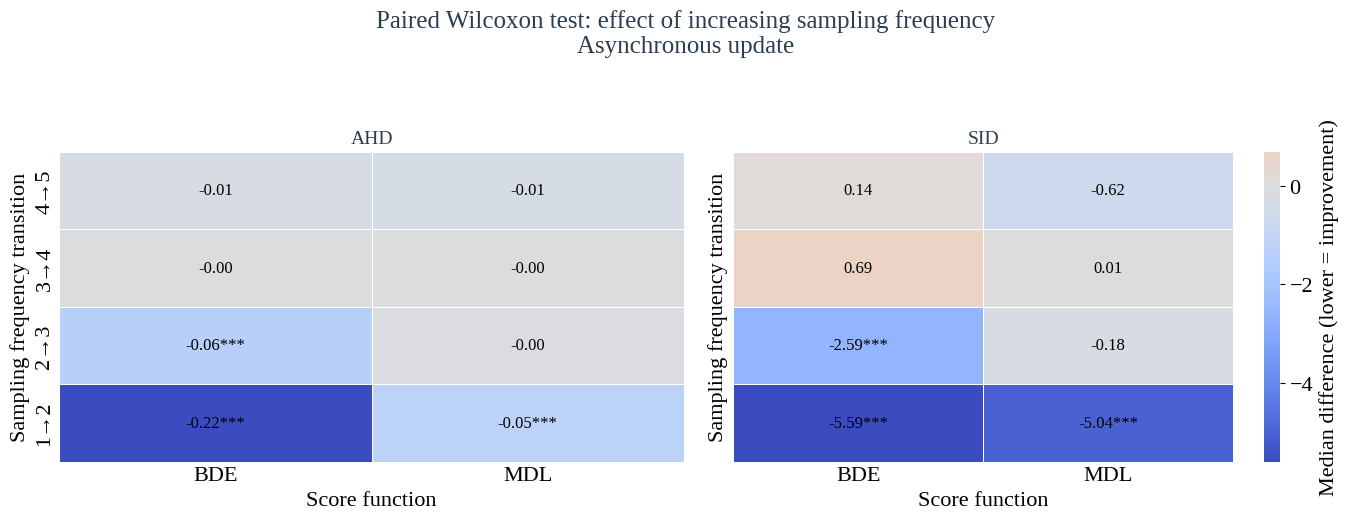

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

plot_wilcoxon_heatmap(
    df_wilcoxon,
    metric="AHD",
    update_mode="asynchronous",
    transitions_order=sorted(df_wilcoxon['transition'].unique(), reverse=True),
    ax=axes[0],
    cbar=False
)

plot_wilcoxon_heatmap(
    df_wilcoxon,
    metric="SID",
    update_mode="asynchronous",
    transitions_order=sorted(df_wilcoxon['transition'].unique(), reverse=True),
    ax=axes[1],
    cbar=True
)

fig.suptitle(
    "Paired Wilcoxon test: effect of increasing sampling frequency\n"
    "Asynchronous update",
    fontsize=18,
    y=1.05
)

plt.tight_layout()
plt.show()



One caveat is that our implementation of those functions is simplified compared to implemented in BNfinder, this does not affect trend of functions but changes their absolute value


i ujemna log wiarygodność i dodawanie a nie mnożę tego theta

artykuł - 1

@article{article,
author = {Bonett, Douglas and Wright, Thomas},
year = {2000},
month = {02},
pages = {23-28},
title = {Sample Size Requirements for Estimating Pearson, Kendall and Spearman Correlations},
volume = {65},
journal = {Psychometrika},
doi = {10.1007/BF02294183}
}

https://www.researchgate.net/publication/24063325_Sample_size_requirements_for_estimating_Pearson_Kendall_and_Spearman_correlations/citation/download